In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Kaggle- https://www.kaggle.com/datasets/fatimasohailshaukat/breast-cancer-wisconsin-dataset

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
564,False
565,False
566,False
567,False


In [ ]:
data.drop(['id', 'Unnamed: 32'], axis = 1, inplace=True, errors = 'ignore')

In [ ]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [ ]:
data.dtypes

,0
diagnosis,int64
radius_mean,float64
texture_mean,float64
perimeter_mean,float64
area_mean,float64
smoothness_mean,float64
compactness_mean,float64
concavity_mean,float64
concave points_mean,float64
symmetry_mean,float64


In [ ]:
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


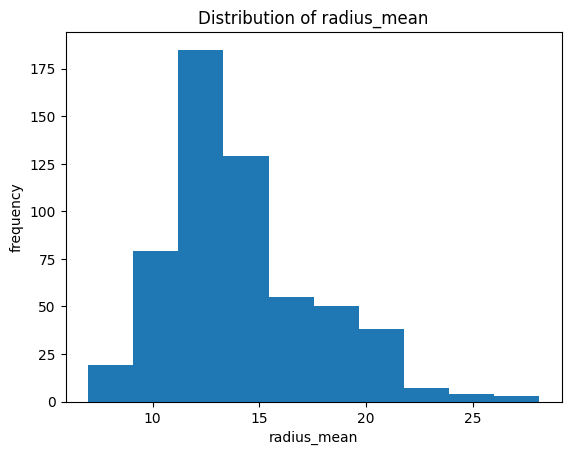

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
plt.hist(data['radius_mean'])
plt.xlabel('radius_mean')
plt.ylabel('frequency')
plt.title('Distribution of radius_mean')
plt.show()

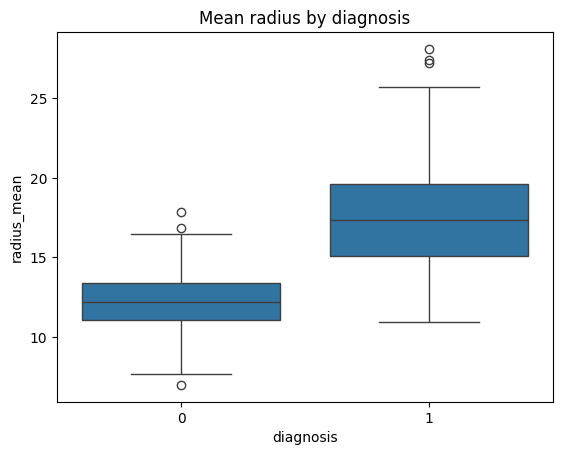

In [ ]:
import seaborn as sns

sns.boxplot(x='diagnosis', y='radius_mean', data=data)
plt.title('Mean radius by diagnosis')
plt.show()

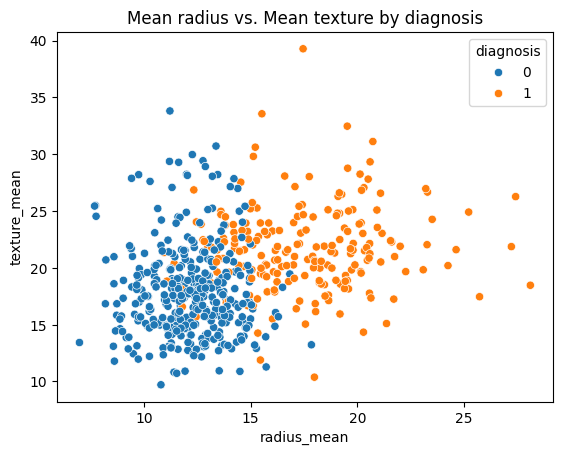

In [ ]:
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data)
plt.title('Mean radius vs. Mean texture by diagnosis')
plt.show()

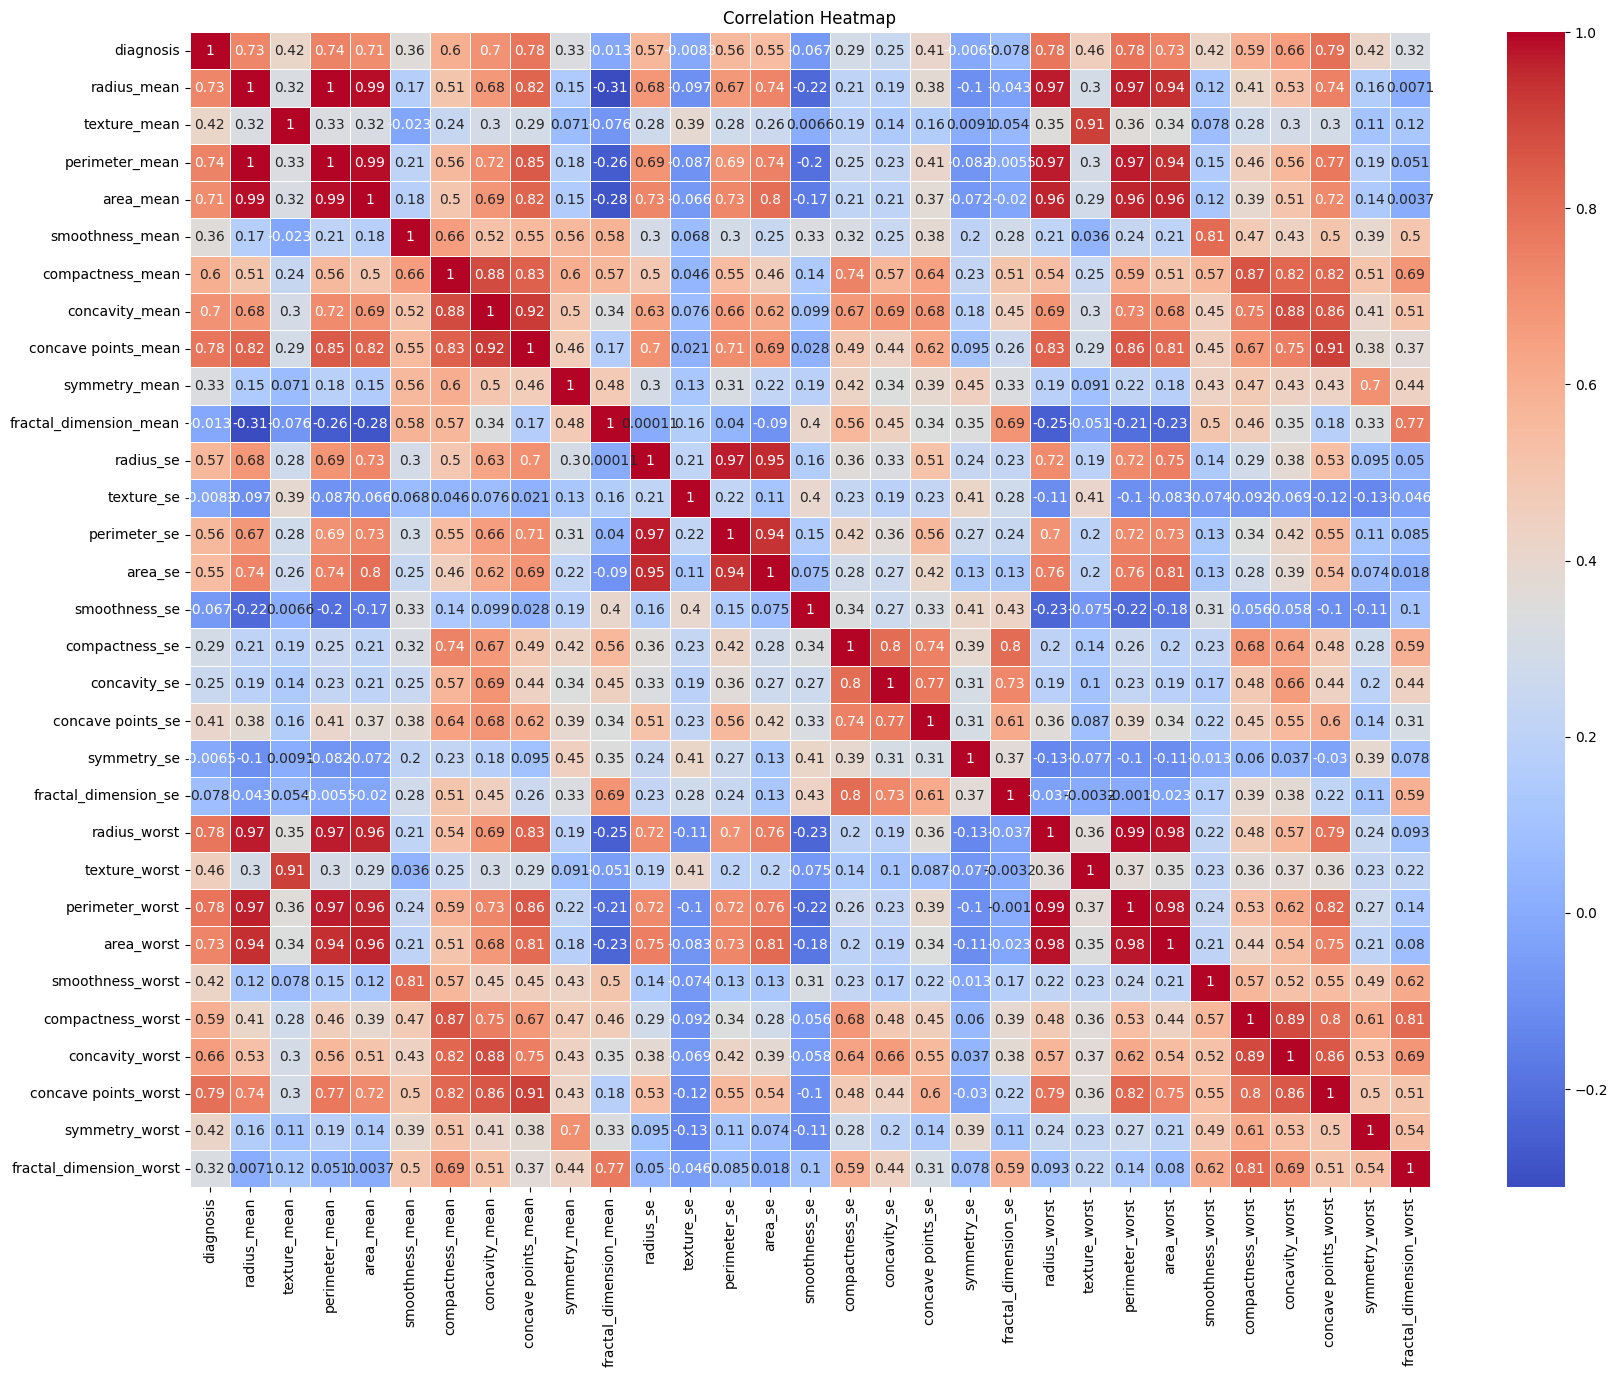

In [ ]:
plt.figure(figsize=(20, 15))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

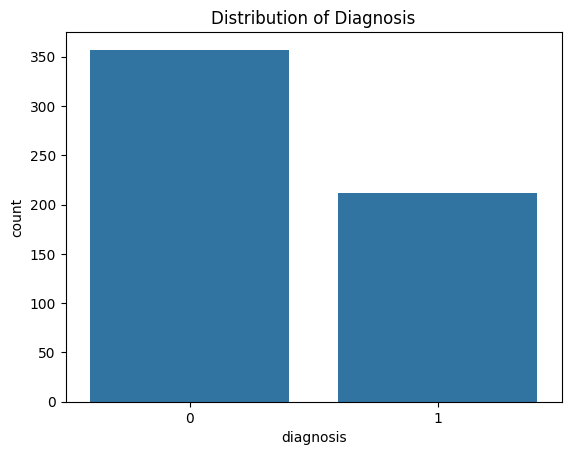

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Diagnosis')
plt.show()

In [ ]:
print(data['diagnosis'].value_counts())

diagnosis
0    357
1    212
Name: count, dtype: int64


In [ ]:
print(data['diagnosis'].value_counts(normalize=True)*100)

diagnosis
0    62.741652
1    37.258348
Name: proportion, dtype: float64


Model Training

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb
import lightgbm as lgb

# 📌 Split Features (X) and Target (y)
X = data.drop(columns=['diagnosis'])  # Features
y = data['diagnosis']  # Target (Already Binary)

# 📌 Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 📌 Scale Data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 📌 Define Binary Classification Models
models = {
    "Logistic Regression": LogisticRegression(solver="liblinear"),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting (XGBoost)": xgb.XGBClassifier(
        objective="binary:logistic", eval_metric="logloss", random_state=42
    ),
    "LightGBM": lgb.LGBMClassifier(
        objective='binary',
        boosting_type='gbdt',
        num_leaves=31,
        learning_rate=0.05,
        n_estimators=100,
        random_state=42
    ),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "AdaBoost": AdaBoostClassifier(n_estimators=50, random_state=42)
}

# 📌 Train and Evaluate Models
results = {}
for name, model in models.items():
    print(f"\n🔹 Training {name}...")

    # Use scaled data for KNN (and optionally SVM)
    if name in ["K-Nearest Neighbors"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    # Store results
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Print classification report
    print(f"✅ Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

# 📌 Print final accuracy comparison
print("\n📊 Model Accuracy Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")



🔹 Training Logistic Regression...
✅ Accuracy: 0.9386
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        72
           1       0.97      0.86      0.91        42

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114


🔹 Training Random Forest...
✅ Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114


🔹 Training Gradient Boosting (XGBoost)...
✅ Accuracy: 0.9737
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy      

In [ ]:
print("Contents of results dictionary:")
print(results)

Contents of results dictionary:
{'Logistic Regression': 0.9385964912280702, 'Random Forest': 0.9736842105263158, 'Gradient Boosting (XGBoost)': 0.9736842105263158, 'LightGBM': 0.9649122807017544, 'Support Vector Machine': 0.9035087719298246, 'K-Nearest Neighbors': 0.956140350877193, 'Naive Bayes': 0.9385964912280702, 'AdaBoost': 0.9824561403508771}


Compairing accuracy

/tmp/ipython-input-3496851341.py:24: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


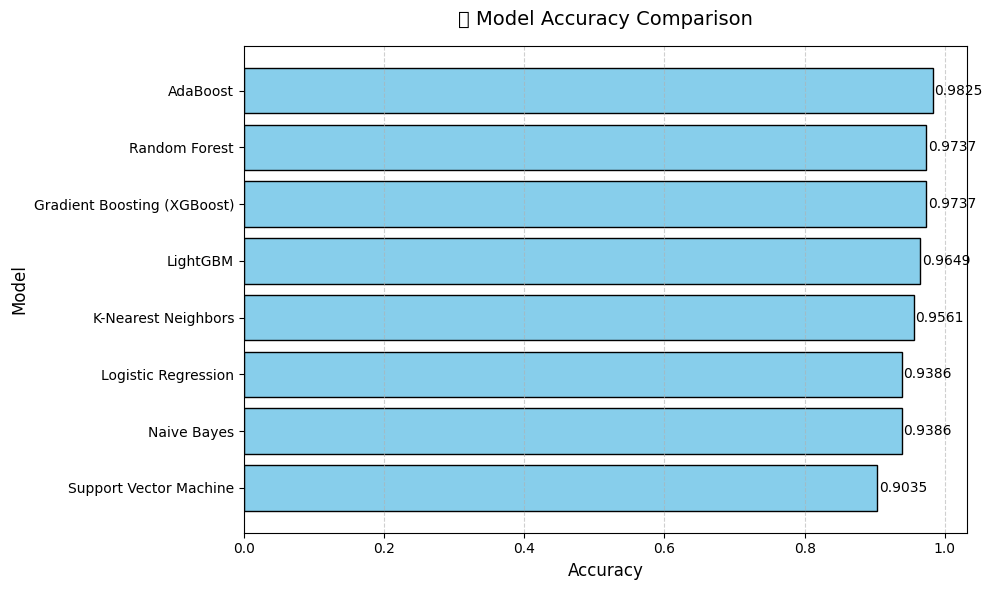

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# 🎨 Plot model accuracies
plt.figure(figsize=(10, 6))
bars = plt.barh(results_df["Model"], results_df["Accuracy"], color="skyblue", edgecolor="black")

plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.title("🔹 Model Accuracy Comparison", fontsize=14, pad=15)
plt.gca().invert_yaxis()  # Show best model at the top
plt.grid(axis="x", linestyle="--", alpha=0.6)

# 🏷️ Annotate each bar with its accuracy value
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.002, bar.get_y() + bar.get_height()/2,
             f"{width:.4f}", va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 📊 Train, predict, and collect metrics
summary = []

for name, model in models.items():
    print(f"🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    summary.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# 📋 Create summary DataFrame
summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# 📈 Display table
print("\n📊 Model Performance Summary:")
print(summary_df.to_string(index=False))

🔹 Training Logistic Regression...
🔹 Training Random Forest...
🔹 Training Gradient Boosting (XGBoost)...
🔹 Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 170, number of negative: 285
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000257 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4542
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.373626 -> initscore=-0.516691
[LightGBM] [Info] Start training from score -0.516691
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
print(summary_df.columns)
print(summary_df.head())

Index(['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'], dtype='object')
                         Model  Accuracy  Precision    Recall  F1 Score
0                     AdaBoost  0.982456   1.000000  0.952381  0.975610
1                Random Forest  0.973684   1.000000  0.928571  0.962963
2  Gradient Boosting (XGBoost)  0.973684   1.000000  0.928571  0.962963
3                     LightGBM  0.964912   1.000000  0.904762  0.950000
4          Logistic Regression  0.938596   0.972973  0.857143  0.911392


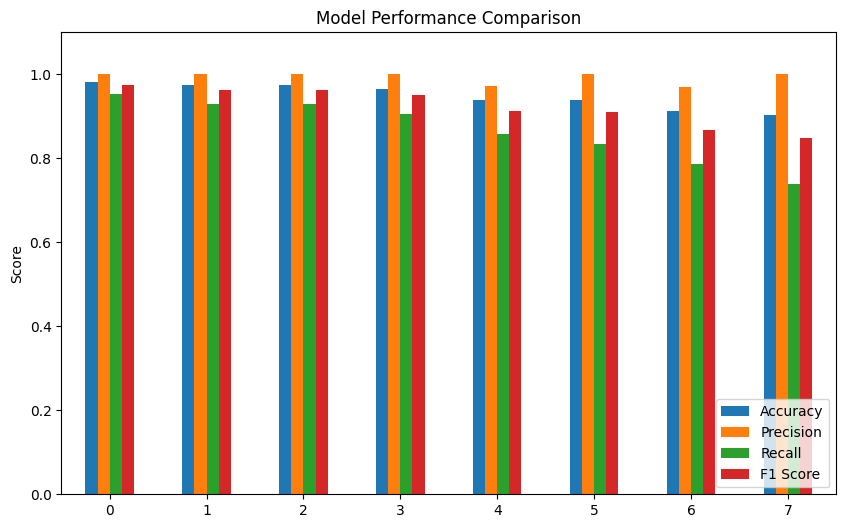

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
summary_df[metrics].plot(kind='bar', figsize=(10, 6))

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.ylim(0, 1.1)
plt.xticks(rotation=0)
plt.legend(loc = 'lower right')
plt.show()

plt.figure(figsize=(10, 6))

Hyperparameter Tuning For All The Models


 Tuning LogisticRegression ...
 Best params for LogisticRegression: {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
 Best CV ROC-AUC: 0.9958

 Tuning NaiveBayes ...
 Best params for NaiveBayes: {'model__var_smoothing': 1e-09}
 Best CV ROC-AUC: 0.9872

 Tuning SVM ...
 Best params for SVM: {'model__C': 10, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
 Best CV ROC-AUC: 0.9944

 Tuning RandomForest ...
 Best params for RandomForest: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 200}
 Best CV ROC-AUC: 0.9906

 Tuning KNN ...
 Best params for KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 9, 'model__weights': 'distance'}
 Best CV ROC-AUC: 0.9913

 Tuning AdaBoost ...
 Best params for AdaBoost: {'model__learning_rate': 1, 'model__n_estimators': 50}
 Best CV ROC-AUC: 0.9925

 Tuning GradientBoosting ...
 Best params for GradientBoosting: {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 200}
 Best 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

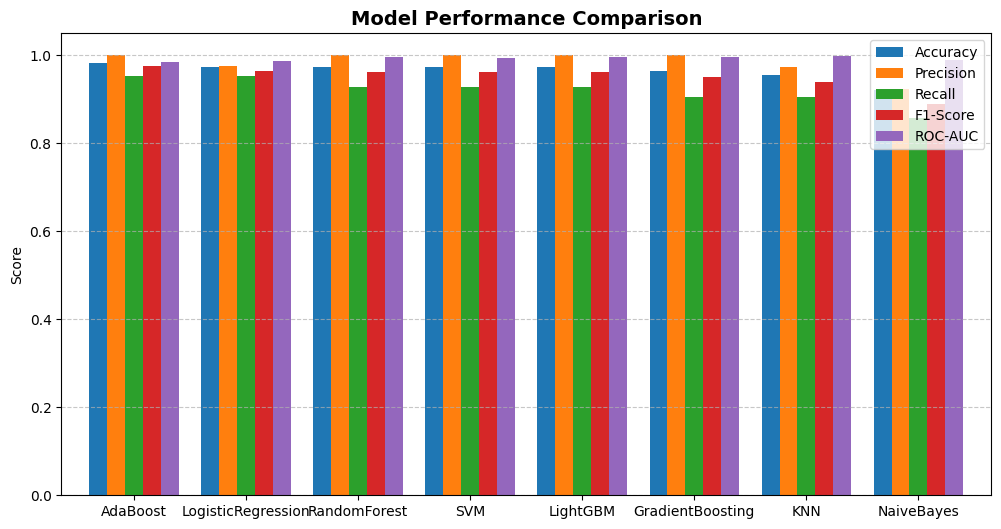

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt

# === Define models and parameter grids ===
models = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'model__C': [0.01, 0.1, 1, 10, 100], 'model__penalty': ['l2'], 'model__solver': ['lbfgs']}
    ),
    "NaiveBayes": (
        GaussianNB(),
        {'model__var_smoothing': [1e-09, 1e-08, 1e-07]}
    ),
    "SVM": (
        SVC(probability=True, random_state=42),
        {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7, 9], 'model__weights': ['uniform', 'distance'], 'model__metric': ['euclidean', 'manhattan']}
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100], 'model__learning_rate': [0.01, 0.1, 1]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 5, 7]}
    ),
    "LightGBM": (
        lgb.LGBMClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1], 'model__num_leaves': [31, 50]}
    )
}

# === To store results ===
best_models = {}
results = {}

# === Training & Evaluation ===
for name, (model, param_grid) in models.items():
    print(f"\n Tuning {name} ...")

    # Pipeline: Scaling -> Model
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_

    print(f" Best params for {name}: {grid.best_params_}")
    print(f" Best CV ROC-AUC: {grid.best_score_:.4f}")

    # Evaluate on test set
    y_pred = best_models[name].predict(X_test)
    y_prob = best_models[name].predict_proba(X_test)[:, 1] if hasattr(best_models[name], "predict_proba") else None

    results[name] = {
        'Best_CV_ROC-AUC': grid.best_score_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else float('nan')
    }

# === Summary DataFrame ===
results_df = pd.DataFrame(results).T.sort_values(by="Accuracy", ascending=False)
print("\n Final Model Evaluation Results:")
print(results_df)

# === Visualization ===
plt.figure(figsize=(12, 6))
results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(kind='bar', figsize=(12, 6), rot=0, width=0.8)
plt.title('Model Performance Comparison', fontsize=14, weight='bold')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

SMOTE-RETUNING


🔄 Re-tuning LogisticRegression with SMOTE...
✅ Best params for LogisticRegression: {'model__C': 10}
🏆 Best CV ROC-AUC: 0.9956

🔄 Re-tuning NaiveBayes with SMOTE...
✅ Best params for NaiveBayes: {'model__var_smoothing': 1e-09}
🏆 Best CV ROC-AUC: 0.9896

🔄 Re-tuning SVM with SMOTE...
✅ Best params for SVM: {'model__C': 1, 'model__gamma': 'scale', 'model__kernel': 'rbf'}
🏆 Best CV ROC-AUC: 0.9949

🔄 Re-tuning RandomForest with SMOTE...
✅ Best params for RandomForest: {'model__max_depth': None, 'model__min_samples_split': 5, 'model__n_estimators': 100}
🏆 Best CV ROC-AUC: 0.9906

🔄 Re-tuning KNN with SMOTE...
✅ Best params for KNN: {'model__metric': 'manhattan', 'model__n_neighbors': 7, 'model__weights': 'distance'}
🏆 Best CV ROC-AUC: 0.9914

🔄 Re-tuning AdaBoost with SMOTE...
✅ Best params for AdaBoost: {'model__learning_rate': 1, 'model__n_estimators': 100}
🏆 Best CV ROC-AUC: 0.9935

🔄 Re-tuning GradientBoosting with SMOTE...
✅ Best params for GradientBoosting: {'model__learning_rate': 0

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

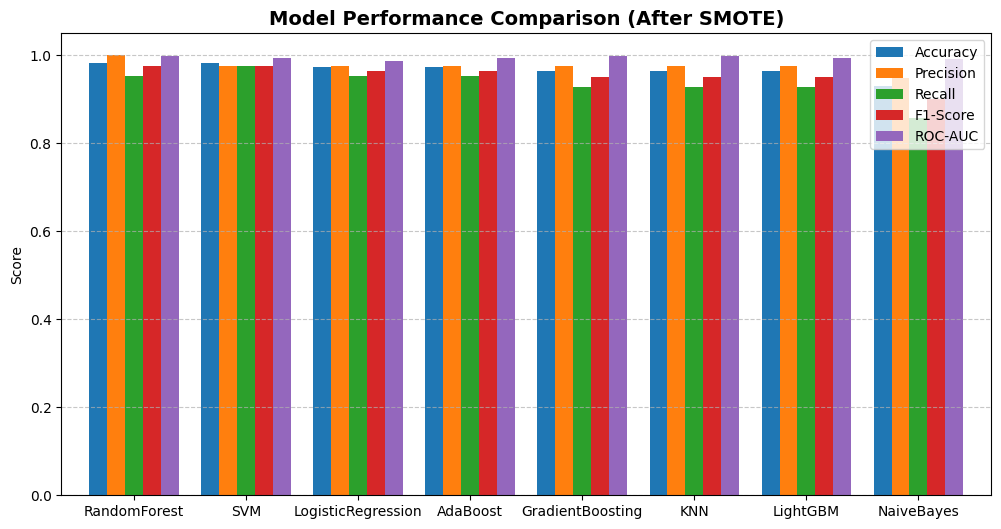

In [ ]:
from imblearn.pipeline import Pipeline   # << use imblearn’s Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# === Define SMOTE ===
smote = SMOTE(random_state=42)

# === Define models and parameter grids ===
models = {
    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'model__C': [0.01, 0.1, 1, 10, 100]}
    ),
    "NaiveBayes": (
        GaussianNB(),
        {'model__var_smoothing': [1e-09, 1e-08, 1e-07]}
    ),
    "SVM": (
        SVC(probability=True, random_state=42),
        {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf'], 'model__gamma': ['scale', 'auto']}
    ),
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__max_depth': [None, 10, 20], 'model__min_samples_split': [2, 5]}
    ),
    "KNN": (
        KNeighborsClassifier(),
        {'model__n_neighbors': [3, 5, 7, 9], 'model__weights': ['uniform', 'distance'], 'model__metric': ['euclidean', 'manhattan']}
    ),
    "AdaBoost": (
        AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100], 'model__learning_rate': [0.01, 0.1, 1]}
    ),
    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1], 'model__max_depth': [3, 5, 7]}
    ),
    "LightGBM": (
        lgb.LGBMClassifier(random_state=42),
        {'model__n_estimators': [100, 200], 'model__learning_rate': [0.01, 0.1], 'model__num_leaves': [31, 50]}
    )
}

# === To store results ===
best_models_smote = {}
results_smote = {}

# === Training & Evaluation with SMOTE ===
for name, (model, param_grid) in models.items():
    print(f"\n🔄 Re-tuning {name} with SMOTE...")

    # Pipeline: SMOTE -> Scaling -> Model
    pipe = Pipeline([
        ('smote', smote),
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    grid = GridSearchCV(
        estimator=pipe,
        param_grid=param_grid,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1
    )

    grid.fit(X_train, y_train)
    best_models_smote[name] = grid.best_estimator_

    print(f"✅ Best params for {name}: {grid.best_params_}")
    print(f"🏆 Best CV ROC-AUC: {grid.best_score_:.4f}")

    # Evaluate on test set (no SMOTE applied here!)
    y_pred = best_models_smote[name].predict(X_test)
    y_prob = (
        best_models_smote[name].predict_proba(X_test)[:, 1]
        if hasattr(best_models_smote[name], "predict_proba") else None
    )

    results_smote[name] = {
        'Best_CV_ROC-AUC': grid.best_score_,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1-Score': f1_score(y_test, y_pred),
        'ROC-AUC': roc_auc_score(y_test, y_prob) if y_prob is not None else float('nan')
    }

# === Summary DataFrame ===
results_smote_df = pd.DataFrame(results_smote).T.sort_values(by="Accuracy", ascending=False)
print("\n Final Model Evaluation Results (After SMOTE):")
print(results_smote_df)

# === Visualization ===
plt.figure(figsize=(12, 6))
results_smote_df[['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']].plot(
    kind='bar', figsize=(12, 6), rot=0, width=0.8)
plt.title('Model Performance Comparison (After SMOTE)', fontsize=14, weight='bold')
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
best_rf_model = best_models['RandomForest']
best_svm_model = best_models['SVM']

/tmp/ipython-input-3349285489.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


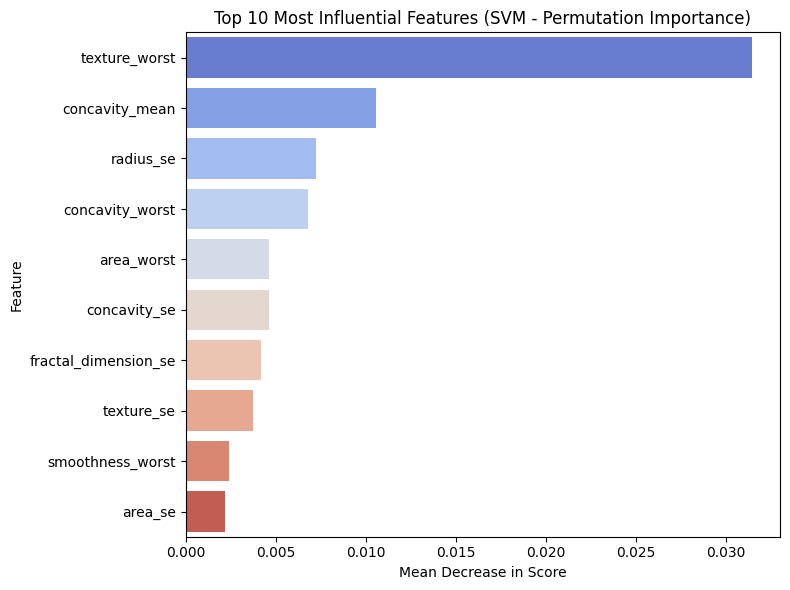

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# Extract trained SVM model from the pipeline
svm_model = best_svm_model.named_steps['model']  # LinearSVC
# scaler = best_svm_model.named_steps['scaler']  # optional if used

feature_names = X_train.columns

# Check if it's linear SVM
if hasattr(svm_model, "coef_"):
    coefficients = svm_model.coef_[0]
    importance = np.abs(coefficients)

    # Create DataFrame
    svm_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients,
        'Importance': importance
    }).sort_values(by='Importance', ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=svm_importance_df.head(10),
        palette=svm_importance_df['Coefficient'].apply(lambda x: 'red' if x < 0 else 'blue')
    )
    plt.title('Top 10 Most Influential Features (Linear SVM)')
    plt.xlabel('Coefficient Magnitude')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('svm_feature_importance.png', dpi=300)
    plt.show()

else:
    # Non-linear SVM: Use permutation importance
    perm_importance = permutation_importance(
        best_svm_model, X_train, y_train, n_repeats=10, random_state=42
    )
    svm_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)

    # Plot top 10 features
    plt.figure(figsize=(8, 6))
    sns.barplot(
        x='Importance',
        y='Feature',
        data=svm_importance_df.head(10),
        palette='coolwarm'
    )
    plt.title('Top 10 Most Influential Features (SVM - Permutation Importance)')
    plt.xlabel('Mean Decrease in Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.savefig('svm_feature_importance.png', dpi=300)
    plt.show()

/tmp/ipython-input-972393307.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10), palette='viridis')


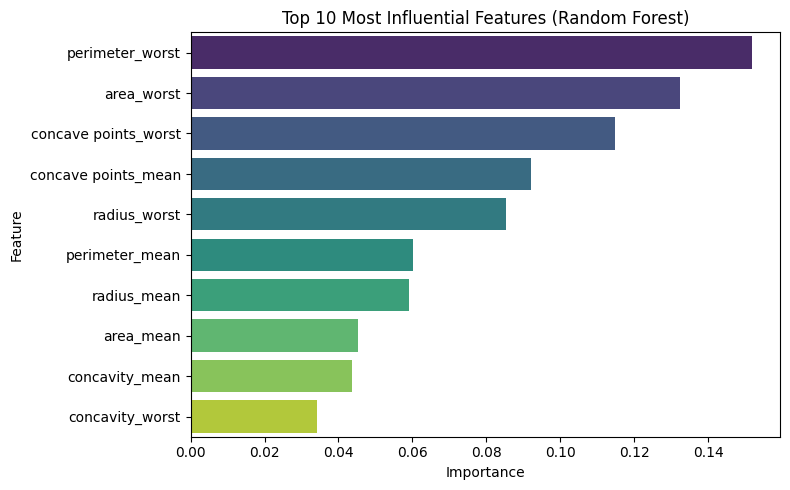

In [ ]:
# Extract the trained Random Forest model from your pipeline
rf_model = best_rf_model.named_steps['model']

# Get feature importances
rf_importances = rf_model.feature_importances_

# Create DataFrame
rf_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': rf_importances
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=rf_importance_df.head(10), palette='viridis')
plt.title('Top 10 Most Influential Features (Random Forest)')
plt.tight_layout()
plt.savefig('rf_feature_importance.png', dpi=300)
plt.show()

In [ ]:
import joblib

# Example: after training
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "rf_model.pkl")
print("✅ Model saved as rf_model.pkl")

✅ Model saved as rf_model.pkl


In [ ]:
import joblib

# Example: after training
model = SVC()
model.fit(X_train, y_train)

# Save model
joblib.dump(model, "SVM_model.pkl")
print("✅ Model saved as SVM_model.pkl")

✅ Model saved as SVM_model.pkl
